# Trust game statistics

### Game 1. 1 round, 1 agent of each type

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Game_results1.csv') 
print(df.head())

   Number of rounds    Agent name  Agent score
0                 1  Mr. Sherlock            5
1                 1      Mr. Copy            5
2                 1      Mr. Evil           12
3                 1      Mr. Good            5
4                 1    Mr. Grudge            5


In [37]:
df[["Agent name","Agent score"]]

,Agent name,Agent score
0,Mr. Sherlock,5
1,Mr. Copy,5
2,Mr. Evil,12
3,Mr. Good,5
4,Mr. Grudge,5


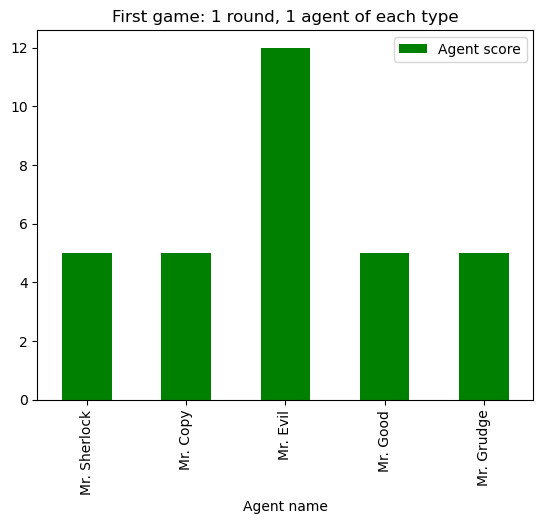

In [230]:
bargraph = df.plot.bar(x = 'Agent name', 
                       y = "Agent score", 
                       title = "First game: 1 round, 1 agent of each type", 
                       color="green")

Mr. Evil wins, of course. How will his score change in a game where there are 2 agents of each type?

### Game 2. 1 round, 2 agents of each type

How will the score change if there are 2 agents of each type in 1 round of the game?

In [259]:
df2 = pd.read_csv('Game_results2.csv') 
df2.head()

,Number of rounds,Agent name,Agent score
0,1,Mr. Copy,12
1,1,Mr. Copy,12
2,1,Mr. Evil,24
3,1,Mr. Evil,24
4,1,Mr. Good,12


In [281]:
df2_unique = df2.drop_duplicates(subset='Agent name')
print(df2_unique.head())

   Number of rounds    Agent name  Agent score
0                 1      Mr. Copy           12
2                 1      Mr. Evil           24
4                 1      Mr. Good           12
6                 1    Mr. Grudge           12
8                 1  Mr. Sherlock           12


So what is the difference in each agents' score if there are 1 or 2 agents of each type?

In [295]:
one_vs_two = df[["Agent name","Agent score"]]
one_vs_two["Score 2"] = df["Agent name"].value_counts()
one_vs_two.columns = ["Agent_name","Score(1 agent in game)", "Score(2 agents in game)"]
print(one_vs_two)

     Agent_name  Score(1 agent in game)  Score(2 agents in game)
0  Mr. Sherlock                       5                      NaN
1      Mr. Copy                       5                      NaN
2      Mr. Evil                      12                      NaN
3      Mr. Good                       5                      NaN
4    Mr. Grudge                       5                      NaN


### Game 3. 1 round, different number of agents of each type

In [352]:
df3 = pd.read_csv('Game_results3.csv')

How many different agents were in this game?

Mr. Good        5
Mr. Grudge      4
Mr. Copy        3
Mr. Sherlock    2
Mr. Evil        1
Name: Agent name, dtype: int64


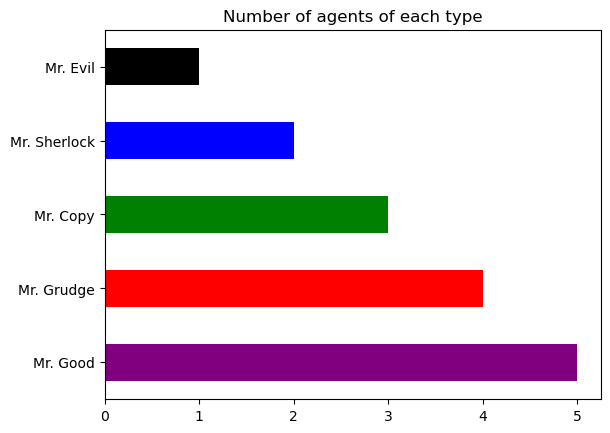

In [358]:
agent_counts = names.groupby('Agent name').aggregate(sum)
print(df3["Agent name"].value_counts())

df3['Agent name'].value_counts().plot(kind= 'barh', 
                                      title = "Number of agents of each type", 
                                      color=['purple', 'red', 'green', 'blue', 'black'])
plt.show()

In [279]:
agent_counts["Number of agents"] = names["Agent name"].value_counts()
agent_counts["Score for 1 agent"] = agent_counts["Agent score"]/agent_counts["Number of agents"]
print(agent_counts)

              Agent score  Number of agents  Score for 1 agent
Agent name                                                    
Mr. Copy               75                 3               25.0
Mr. Evil               42                 1               42.0
Mr. Good              125                 5               25.0
Mr. Grudge            100                 4               25.0
Mr. Sherlock           50                 2               25.0


### Game 4. 1 - 9 rounds, 1 agent of each type

In [308]:
df4 = pd.read_csv('Game_results4.csv') 
df4.head()

,Number of rounds,Agent name,Agent score
0,1,Mr. Grudge,5
1,1,Mr. Good,5
2,1,Mr. Evil,12
3,1,Mr. Sherlock,5
4,1,Mr. Copy,5


How was the score of each agent in each of 9 rounds?

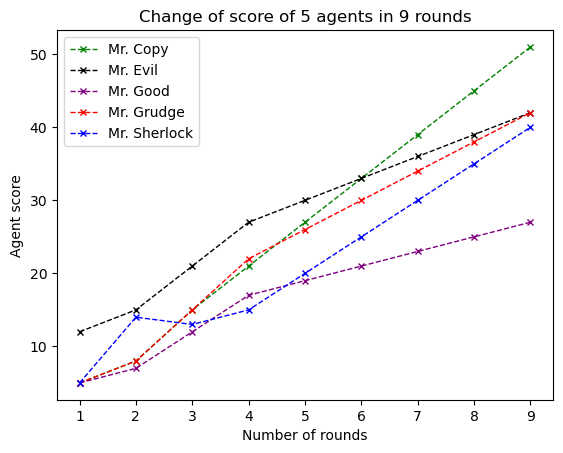

In [351]:
agent_list = ["Mr. Copy", "Mr. Evil", "Mr. Good", "Mr. Grudge", "Mr. Sherlock"]
color_list = ["green", "black", "purple", "red", "blue"]

for i in range(len(agent_list)):
    data = df4[df4['Agent name'].str.contains(agent_list[i])]
    plt.plot(data['Number of rounds'], data['Agent score'],  label = agent_list[i],
         color=color_list[i], marker='x', linestyle='dashed', linewidth=1, markersize=4)

    plt.title("Change of score of 5 agents in 9 rounds")
plt.xlabel("Number of rounds")
plt.ylabel("Agent score")
plt.legend()    

### Game 5. 1 to 9 rounds, Mr. Grudge and Mr. Sherlock

In [330]:
df5 = pd.read_csv('Game_results5.csv')

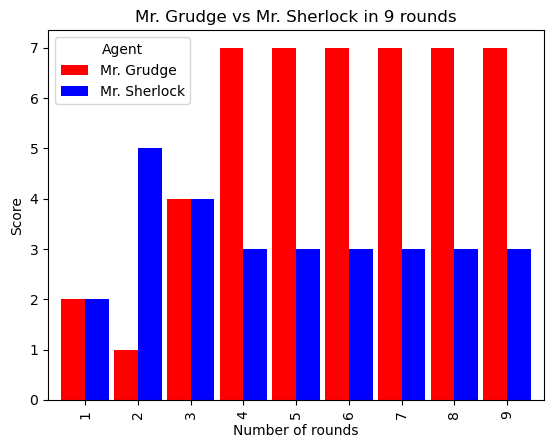

In [339]:
grouped_data = df5.groupby(['Number of rounds', 'Agent name'])['Agent score'].sum().unstack()

grouped_data.plot(kind='bar', width = 0.9, color=["red","blue"]) 
plt.xlabel('Number of rounds')
plt.ylabel('Score')
plt.title('Mr. Grudge vs Mr. Sherlock in 9 rounds')

plt.legend(title='Agent')
plt.show()